# Compare 4 methods to get W, mu, sigma2

## Imports

In [2]:
from ppca import PPCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Datasets

In [3]:
# Loading data

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [16]:
# PPCA parameters
n_components = 2
method = 'em'
epochs = 500

In [17]:
# PPCA
Xts = []
for method in ['baseline', 'svd', 'em', 'gd']:
    print(f"Running PPCA with method: {method}")
    pca = PPCA(n_components=n_components, method=method, max_iter=epochs)
    Xt = pca.fit_transform(X)
    Xts.append(Xt)

Running PPCA with method: baseline
PPCA initialized with n_components=2, method=baseline
Running PPCA with method: svd
PPCA initialized with n_components=2, method=svd
cost_svd tensor(404.9626)
Running PPCA with method: em
PPCA initialized with n_components=2, method=em
Starting EM fitting on 500 epochs...


EM:  63%|██████▎   | 313/500 [00:00<00:00, 864.86iter/s, W_change=8.81e-7, cost=405] 


Running PPCA with method: gd
PPCA initialized with n_components=2, method=gd
Starting gd fitting on 500 epochs...


gd: 100%|██████████| 500/500 [00:00<00:00, 678.94iter/s, loss=405]


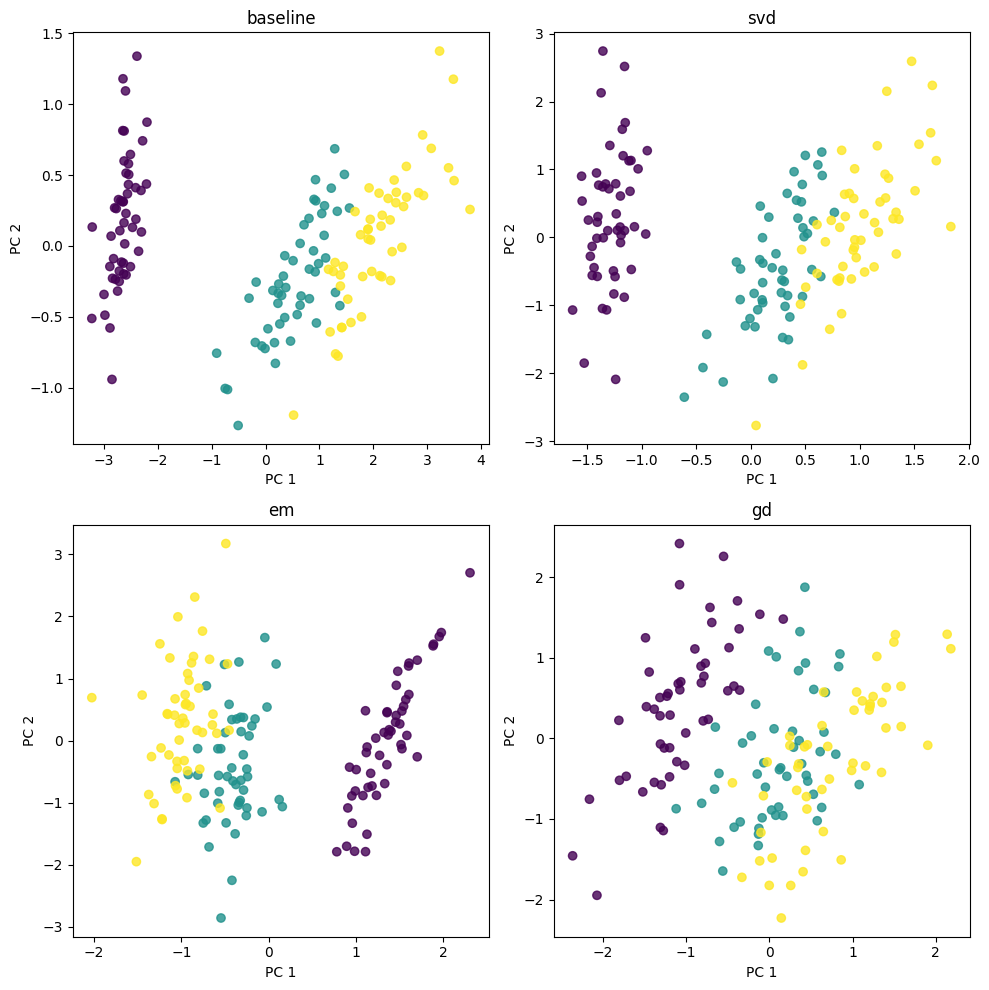

In [ ]:
# Grouped plots in one figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, method in enumerate(['baseline', 'svd', 'em', 'gd']):
    Xt = Xts[i]
    scatter = axs[i // 2, i % 2].scatter(Xt[:, 0], Xt[:, 1], c=y, cmap='viridis', alpha=0.8)
    axs[i // 2, i % 2].set_title(f'{method}')
    axs[i // 2, i % 2].set_xlabel('PC 1')
    axs[i // 2, i % 2].set_ylabel('PC 2')

plt.tight_layout()
plt.show()